In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score

In [2]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.22359727, 0.22359674, 0.2235969 , ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.        , 0.99999695, 0.99999695, ..., 0.007392  , 0.00232694,
       0.        ]), 'Thresholds': array([1.9619045e-05, 1.9620766e-05, 1.9622412e-05, ..., 9.9999976e-01,
       9.9999988e-01, 1.0000000e+00], dtype=float32)}


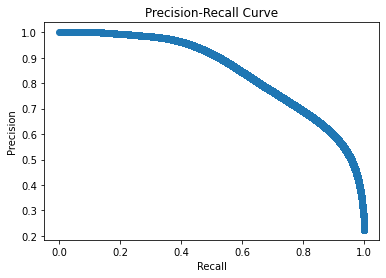

In [3]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

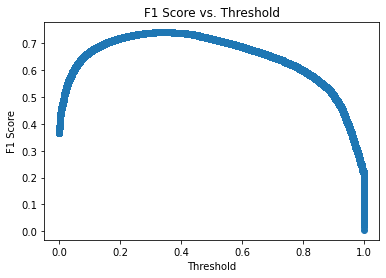

In [4]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

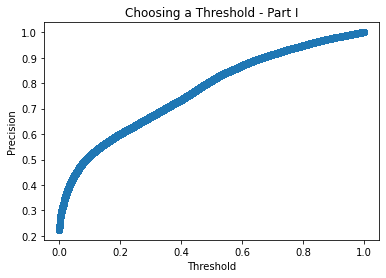

In [5]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

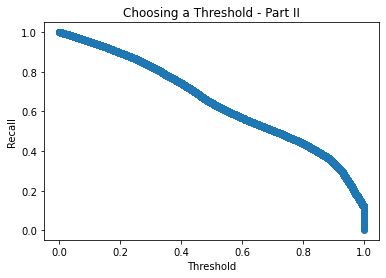

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [7]:
curve['Thresholds'][np.argmax(f1_scores)]

0.33637482

In [8]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[9.77608383e-01 2.59889048e-02 1.98200811e-02 5.62669598e-02
 1.82647526e-01 2.19451845e-01 1.45015754e-02 8.35964203e-01
 2.68896688e-02 5.84864058e-03 4.54414170e-03 1.51747884e-03
 1.98812224e-03 7.96202943e-03 8.52382123e-01 2.35855971e-02
 1.41946375e-01 1.36481732e-01 2.36260355e-03 2.45284126e-03
 1.46525046e-02 4.11544710e-01 6.10169210e-02 3.07940274e-01
 3.93836945e-03 6.89089997e-03 2.06676349e-02 3.64918381e-01
 2.57102579e-01 1.91178322e-01 1.01124446e-04 7.05470447e-04
 2.77494430e-04 5.89991629e-04 1.41216163e-02 1.36684524e-02
 9.96235613e-05 1.98252994e-04 7.35127192e-04 9.04349901e-04
 3.84077020e-02 4.28870274e-03 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.79092133e-08 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.79092133e-08 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.79092133e-08 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.79092133e-08 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.79092133e-08 7.79092133e-08 7.79092133e-08
 7.79092133e-08 7.790921

In [9]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])
    
print(filt_pred[0], filt_act[0])

[0.9776084  0.18264753] [1. 1.]


In [11]:
new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
                                                                     np.hstack(np.array(filt_pred)))

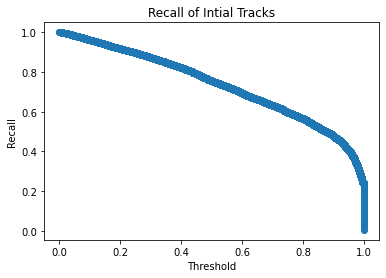

In [12]:
plt.figure()
plt.scatter(new_thresholds, new_recalls[:-1])
plt.title('Recall of Intial Tracks')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [23]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act)

print(mean_acc / len(predicted))

0.8969181589494999


In [35]:
compare_pred = [1.0 * (unpad >= 0.5) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [38]:
accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, unpad_act)]
print(np.mean(accuracies))

0.896918158949425


In [39]:
filt_pred_new = [1.0 * (filt >= 0.5) for filt in filt_pred]
print(filt_pred_new[0], filt_act[0])

[1. 0.] [1. 1.]


In [40]:
filt_accs = [accuracy_score(*pair) for pair in zip(filt_pred_new, filt_act)]
print(np.mean(filt_accs))

0.7560058593750001
